# Comparing the impact of increasing the grid size (at the cost of applying the modifications)

The results presented in the paper allow us to use any (square) grid based covering algorithm and apply it on a sparser grid.
This sparser grid has fewer vertices and, thus, likely allows better solutions and quicker runtimes.
Of course, the path on this sparse grid is not feasible, thus, we need to apply a set of modifications (presented in the paper).
In this notebook, we analyze how much we save by applying any grid based algorithm on the sparser grid and paying for the modifications.



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_json("./03_clean_data.json.zip")
# Convert polygons
import shapely.wkt
data["polygon"] = data["polygon"].apply(lambda p: shapely.wkt.loads(p))
data

,polygon,polygon_area,convex_hull_area,relative_area,instance_path,instance,instance_type,instance_type_simplified,grid_properties,small_tsp_path,...,lns_runtime,lns_is_optimal,lns_path_before_optimization,timelimit_mip,mip_path,mip_obj,mip_runtime,lb,ub,mip_path_before_optimization
0,"POLYGON ((74 159, 75.064 159, 75.064 158.174, ...",200.315068,407.628918,519.009258,../instances/srpg_iso_mc_small/srpg_iso_mc0000...,srpg_iso_mc0000150.poly,srpg_iso,Orthogonal Polygons,"{'side_length': 1, 'min_x': 73.9, 'min_y': 143...","[[74.2828427125, 159.1997957955], [74.28284271...",...,300.284133,False,"[[82.4, 161.297], [82.4, 162.297], [82.4, 162....",300,"[[82.4, 161.297], [82.4, 162.297], [82.4, 162....",347.937057,300.251800,333.711270,347.937057,"[[82.4, 161.297], [82.4, 162.297], [82.4, 162...."
1,"POLYGON ((9 38, 9.672 38, 9.672 37.146, 13.223...",176.274440,328.027520,417.657611,../instances/srpg_iso_mc_small/srpg_iso_mc0000...,srpg_iso_mc0000100.poly,srpg_iso,Orthogonal Polygons,"{'side_length': 1, 'min_x': 8.9, 'min_y': 24.1...","[[9.2828427125, 38.0760035894], [9.2828427125,...",...,300.189853,False,"[[12.4, 39.146], [12.4, 40.146], [12.4, 40.146...",300,"[[12.4, 39.146], [12.4, 40.146], [12.4, 40.146...",274.103136,300.252284,267.498796,274.103136,"[[12.4, 39.146], [12.4, 40.146], [12.4, 40.146..."
2,"POLYGON ((1 4, 1.946 4, 1.946 2.777, 3.836 2.7...",113.593965,203.151249,258.660203,../instances/srpg_iso_mc_small/srpg_iso_mc0000...,srpg_iso_mc0000080.poly,srpg_iso,Orthogonal Polygons,"{'side_length': 1, 'min_x': 1.0, 'min_y': 1.77...","[[1.3535533906000001, 4.1387416998], [2.060660...",...,300.167976,False,"[[2.5, 11.776], [2.5, 12.776], [2.5, 12.776], ...",300,"[[2.5, 11.776], [2.5, 12.776], [2.5, 12.776], ...",199.419067,300.135637,192.919048,199.419067,"[[2.5, 11.776], [2.5, 12.776], [2.5, 12.776], ..."
3,"POLYGON ((67 89, 70.889 89, 70.889 90.391, 72....",302.088850,663.700025,845.049118,../instances/srpg_iso_mc_small/srpg_iso_mc0000...,srpg_iso_mc0000230.poly,srpg_iso,Orthogonal Polygons,"{'side_length': 1, 'min_x': 67.0, 'min_y': 77....","[[67.2121320344, 88.9658657865], [67.919238815...",...,300.322078,False,"[[81.0, 85.235], [82.0, 85.235], [82.0, 85.235...",300,"[[81.0, 85.235], [82.0, 85.235], [82.0, 85.235...",522.219772,300.399144,504.183903,522.219772,"[[81.0, 85.235], [82.0, 85.235], [82.0, 85.235..."
4,"POLYGON ((19 33, 26.076 33, 26.076 32.234, 27....",142.730905,253.580125,322.868243,../instances/srpg_iso_mc_small/srpg_iso_mc0000...,srpg_iso_mc0000108.poly,srpg_iso,Orthogonal Polygons,"{'side_length': 1, 'min_x': 18.4, 'min_y': 23....","[[19.2828427125, 32.9908347648], [19.282842712...",...,300.137709,False,"[[20.9, 27.752], [20.9, 28.752], [20.9, 28.752...",300,"[[20.9, 27.752], [20.9, 28.752], [20.9, 28.752...",250.992367,300.154858,244.895268,250.992367,"[[20.9, 27.752], [20.9, 28.752], [20.9, 28.752..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,"POLYGON ((5 15, 5 14, 6 14, 6 13, 3 13, 3 12, ...",60.000000,93.000000,118.411278,../instances/srpg_iso_aligned_small/srpg_iso_a...,srpg_iso_aligned0000035.poly,srpg_iso_aligned,Polyominoes,"{'side_length': 1, 'min_x': 2.0, 'min_y': 11.0...","[[1.9292893219, 14.8890872965], [2.6363961031,...",...,300.072372,False,"[[11.0, 14.5], [12.0, 14.5], [12.0, 14.5], [13...",300,"[[11.0, 14.5], [12.0, 14.5], [12.0, 14.5], [13...",74.089688,300.067655,72.828998,74.089688,"[[11.0, 14.5], [12.0, 14.5], [12.0, 14.5], [13..."
323,"POLYGON ((3 14, 3 16, 5 16, 5 17, 7 17, 7 15, ...",80.000000,182.000000,231.729597,../instances/srpg_iso_aligned_small/srpg_iso_a...,srpg_iso_aligned0000067.poly,srpg_iso_aligned,Polyominoes,"{'side_length': 1, 'min_x': 1.0, 'min_y': 1.0,...","[[1.3535533906000001, 13.7279220614], [2.06066...",...,300.088710,False,"[[11.0, 5.5], [11.6464466094, 5.6464466095], [...",300,"[[11.0, 5.5], [11.6464466094, 5.6464466095], [...",110.641484,300.160318,105.539559,110.641484,"[[11.0, 5.5], [11.6464466094, 5.646446

## How high are the overall savings?

In [2]:
data["relative_dense"] = 0
data["relative_sparse"] = -100*(1-data["tsp_obj"]/data["small_tsp_obj"])
data["relative_mip"] = -100*(1-data["mip_obj"]/data["small_tsp_obj"])

In [3]:
data.groupby("instance_type_simplified")[["relative_dense","relative_sparse", "relative_mip"]].mean()

,relative_dense,relative_sparse,relative_mip
instance_type_simplified,,,
Octagonal Polygons,0.0,-23.671477,-27.617841
Orthogonal Polygons,0.0,-5.245223,-10.719248
Polyominoes,0.0,-27.238598,-31.093019


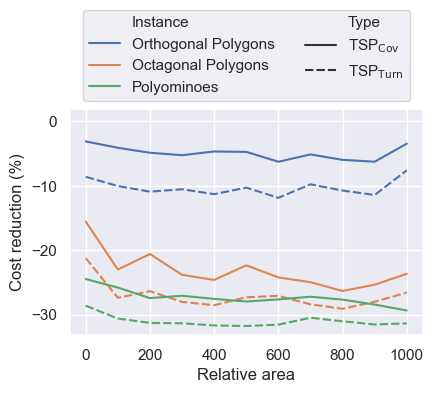

In [10]:
import seaborn as sns
sns.set_theme()
t = data.copy()
t["x"] = t["relative_area"].apply(lambda x: 100*round(x/100))

t = pd.melt(t, id_vars=["x", "instance_type_simplified"], value_vars=["relative_dense", "relative_sparse", "relative_mip"], value_name="y", var_name="type")
t=t[t["type"]!="relative_dense"]
t["type"].replace({"relative_sparse": "TSP$_{\mathrm{Cov}}$", "relative_mip": "TSP$_{\mathrm{Turn}}$"}, inplace=True)
fig, ax = plt.subplots(figsize=(4.5,4.5))
t.rename(columns={"instance_type_simplified": "Instance", "type": "Type"}, inplace=True)
sns.lineplot(data=t, x="x", y="y", style="Type", hue="Instance", errorbar=None)
plt.ylabel("Cost reduction (%)")
plt.xlabel("Relative area")

plt.ylim(None, 2)
plt.tight_layout()
fig.subplots_adjust(top=0.65)
plt.legend(ncol=2,bbox_to_anchor=(0.5, 1.47), loc="upper center")
plt.savefig("./out/06_costs/cost_reduction.pdf")
plt.show()

The plot shows that the coverage tours on the sparse grid are, after modification to regain full coverage, 10% shorter for srpg_iso, and 20-30% shorter for the other instances.
The relative area does not seem to be a major factor.
Performing the optimization with the modification cost sensitive objective yields another ~5% for all instances.

Consequently, working on the sparse grid is worth the high modification costs.

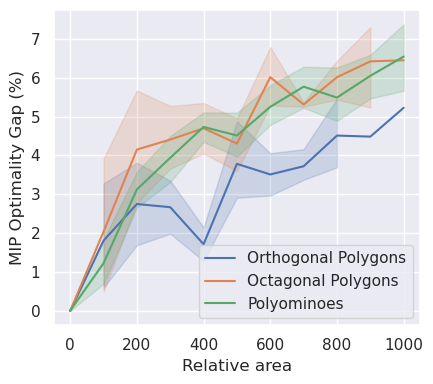

In [107]:
t = data.copy()
t["x"] = t["relative_area"].apply(lambda x: 100*round(x/100))
t["y"] = 100*(1-t["lb"]/t["ub"])
fig, ax = plt.subplots(figsize=(4.5,4))
sns.lineplot(data=t, ax=ax, x="x", y="y", hue="instance_type_simplified")
plt.ylabel("MIP Optimality Gap (%)")
plt.xlabel("Relative area")
plt.legend(ncol=1)
plt.tight_layout()
plt.savefig("./out/06_costs/mip_gap.pdf")
plt.show()